Michael Cho homework 4

In [410]:
import pandas as pan
import numpy as nump
import matplotlib.pyplot as pyp
import seaborn as sea
from scipy.stats import skew, norm
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
import keras_tuner as kt


In [411]:
#Checking data
loans = pan.read_csv("C:/Users/micha/loan_data.csv")
loans.sample(20)
loans.shape
loans.info()
#Data is null free so we can move on) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Number 1A.  Data filtering

In [412]:
#data filtering from catgeorical to numerical discretely
loans = pan.get_dummies(loans, columns = ["purpose"])
loans.sample(20)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
2401,1,0.1316,405.25,10.968198,14.07,702,5850.000000,14057,37.8,0,0,0,0,False,False,True,False,False,False,False
5631,1,0.1218,532.80,10.691945,17.40,717,6390.000000,17070,24.7,0,0,0,0,False,False,True,False,False,False,False
6323,1,0.1322,202.81,11.057251,10.96,682,4410.000000,20531,85.9,2,0,0,0,False,False,False,False,False,True,False
4218,1,0.1357,407.63,10.858999,15.48,682,3929.958333,8718,45.6,0,0,0,0,False,False,True,False,False,False,False
7285,1,0.0788,31.29,11.184421,17.15,717,3690.000000,23572,66.6,1,0,0,0,True,False,False,False,False,False,False
7176,1,0.1311,371.20,10.404263,14.58,687,1980.041667,5763,60.7,0,0,0,0,False,False,True,False,False,False,False
772,1,0.0976,213.83,11.188870,15.63,717,4379.958333,6161,26.6,0,0,0,0,False,True,False,False,False,False,False
7583,1,0.1273,209.79,10.043249,21.23,687,2760.041667,6867,41.6,0,0,0,0,False,False,True,False,False,False,False
5215,1,0.1148,430.24,11.050890,13.33,727,3060.000000,13046,65.2,0,0,0,0,False,False,True,False,False,False,False
4192,1,0.0859,151.73,10.968129,8.07,737,2880.000000,3333,20.1,1,0,0,0,True,False,False,False,False,False,False


In [413]:
#making sure all are of numerical value
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

Since filtering is done we need balancing now. 
Number 1B. Data Balancing

In [414]:
#check if target data is balanced.
loans["not.fully.paid"].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [415]:
#clearly not balanced so has to be balanced so we don't run into problems later. 
not_fully_paid0 = loans[loans['not.fully.paid'] == 0]
not_fully_paid1 = loans[loans['not.fully.paid'] == 1]

#check shape
print('not_fully_paid0', not_fully_paid0.shape)
print('not_fully_paid1', not_fully_paid1.shape)

not_fully_paid0 (8045, 20)
not_fully_paid1 (1533, 20)


In [416]:
# Resample minority data to increase size and add it back to the majority dataset.
loansdf_minority_increased = resample(not_fully_paid1, replace = True, n_samples = 8045)
loansdf = pan.concat([not_fully_paid0, loansdf_minority_increased])

In [417]:
#Shuffle dataset and check balance
loansdf = shuffle(loansdf)
loansdf['not.fully.paid'].value_counts()  

not.fully.paid
1    8045
0    8045
Name: count, dtype: int64

Since they are equal now balancing is done.

Number 2. Data analysis:


In [418]:
#first check for data skewing.
loansdf.skew()

credit.policy                 -1.102308
int.rate                       0.173450
installment                    0.891947
log.annual.inc                 0.039531
dti                            0.019680
fico                           0.562596
days.with.cr.line              1.135664
revol.bal                     13.370614
revol.util                    -0.036891
inq.last.6mths                 3.447983
delinq.2yrs                    5.132333
pub.rec                        4.188218
not.fully.paid                 0.000000
purpose_all_other              1.167299
purpose_credit_card            2.409409
purpose_debt_consolidation     0.380905
purpose_educational            4.620825
purpose_home_improvement       3.403638
purpose_major_purchase         4.812926
purpose_small_business         3.049401
dtype: float64

The analysis shows that not.fully.paid is perfectedly balanced, or has symmetrical normal distribution , hence the 0.00000. Some like revol.util and int.rate are near such balance since they are less than 1 or -1 away from zero. The other near such balance are repsented down below.

In [419]:
loansdf.columns[((loansdf.skew()<1)& (loansdf.skew()>0)) | ((loansdf.skew ()<0) & (loansdf.skew()> -1))]

Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'revol.util', 'purpose_debt_consolidation'],
      dtype='object')

Out of the rest that can be considered skewed, most fall in the range between 1 and 6, which means that most are skewed to the right. credit policy has a negative skew of with a skew to the left. revol.bal has the greatest skew regardless of direction, with a score of generally in the two digit range. we can generate graphs to show such skew. Boxplots will give us a better idea of where the center of the data is most likely and where the outliers are.

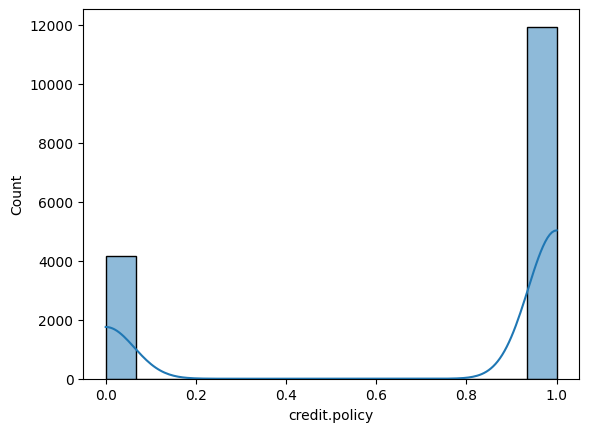

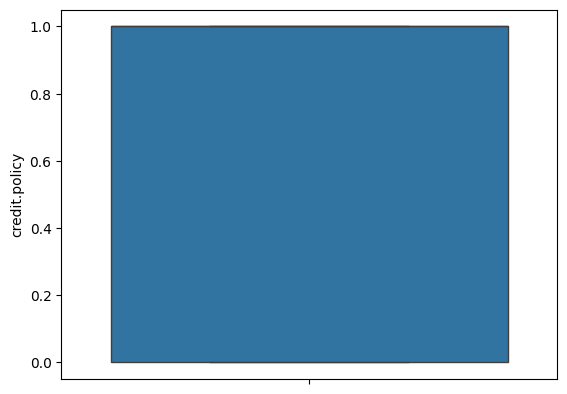

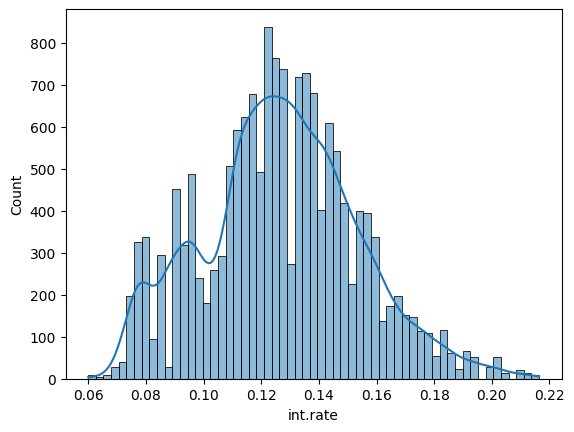

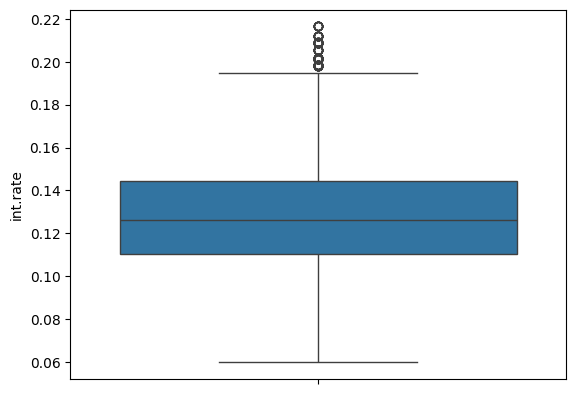

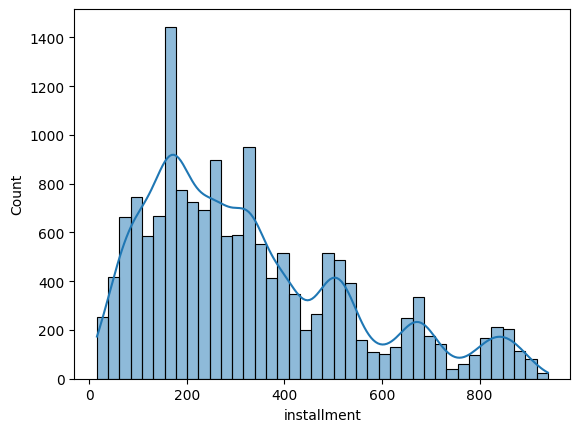

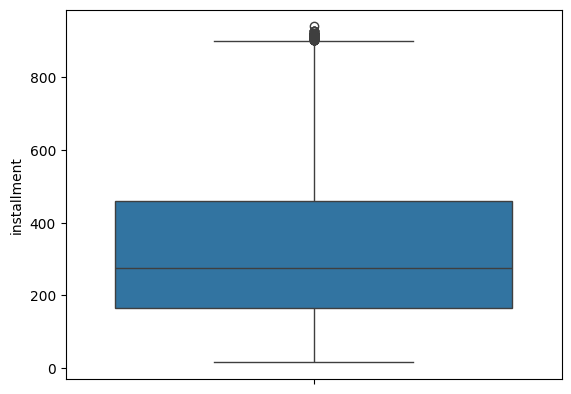

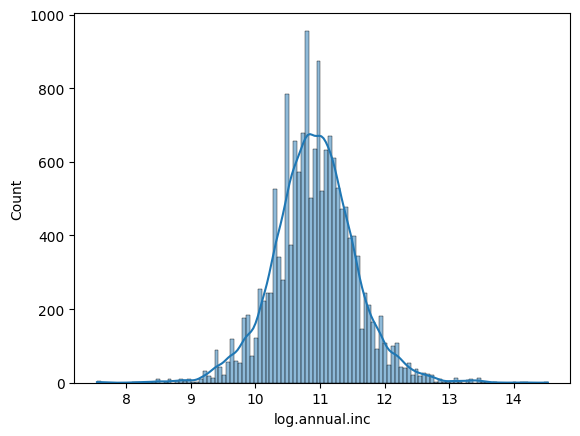

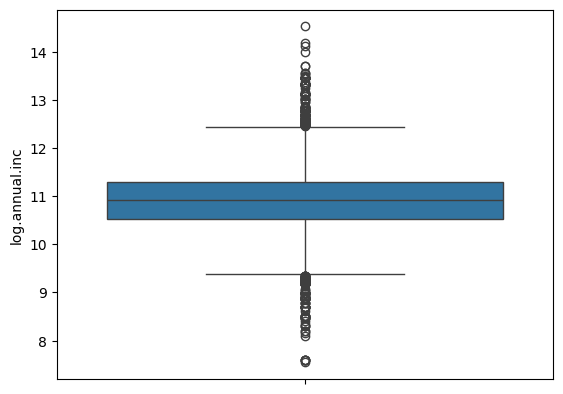

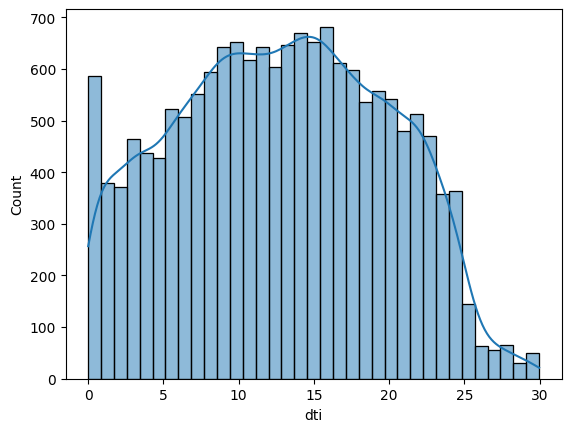

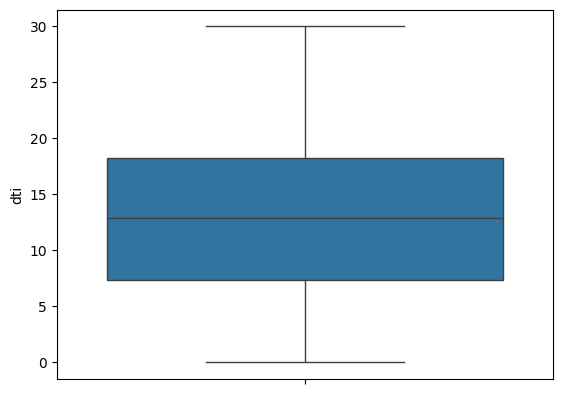

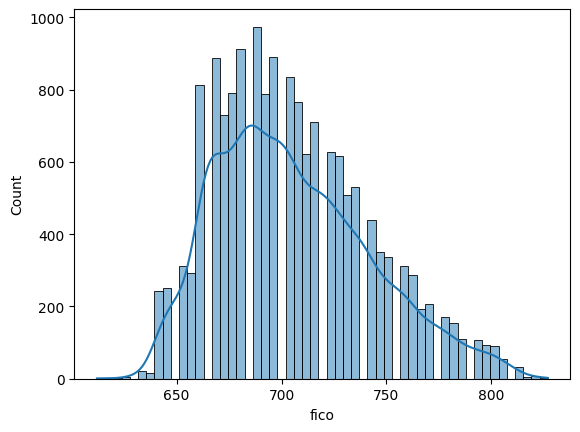

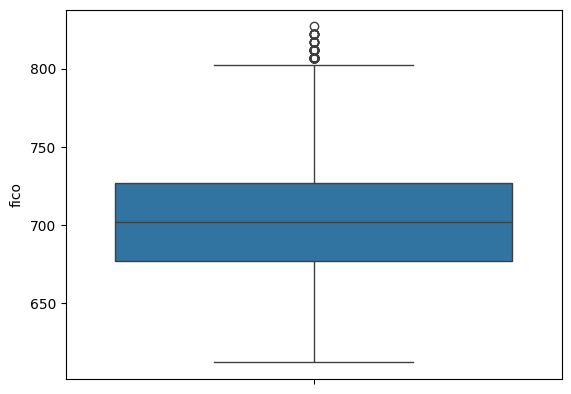

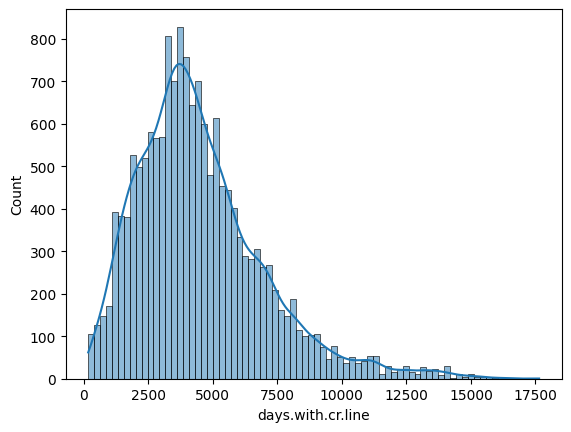

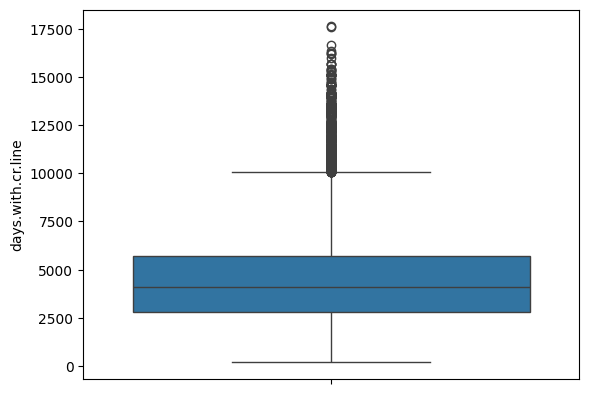

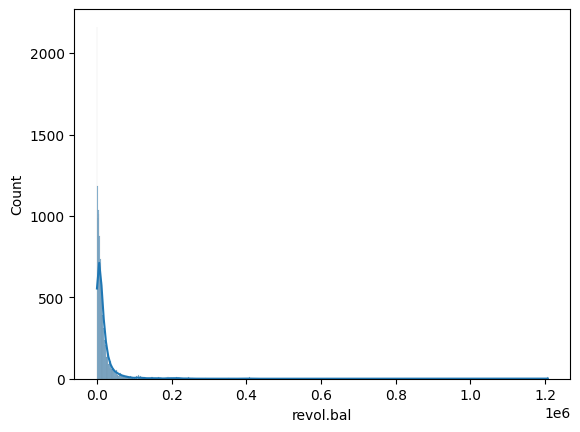

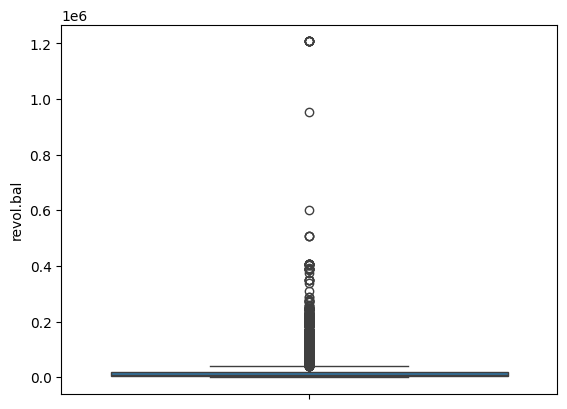

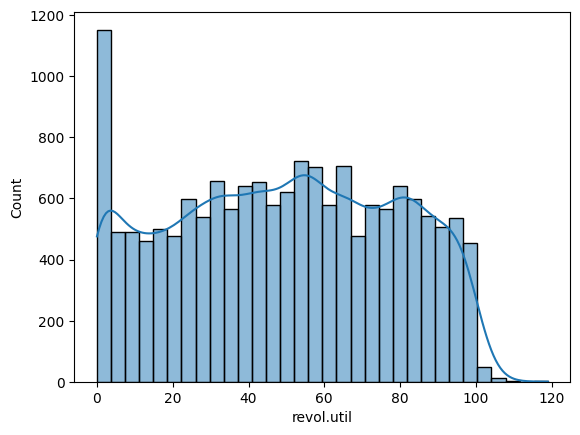

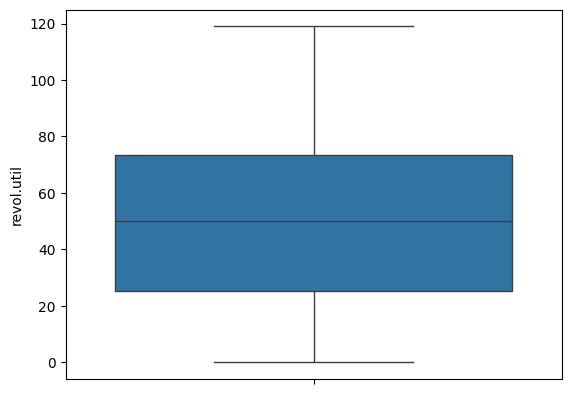

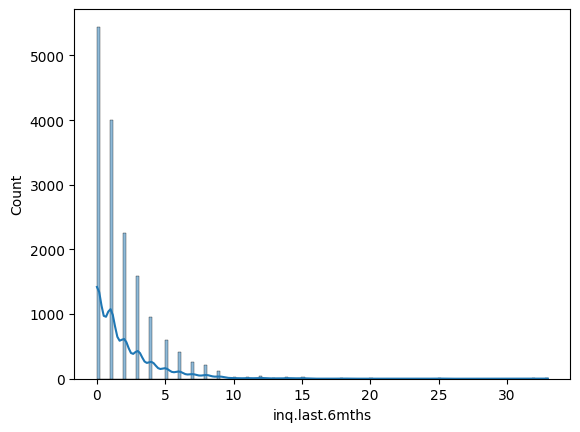

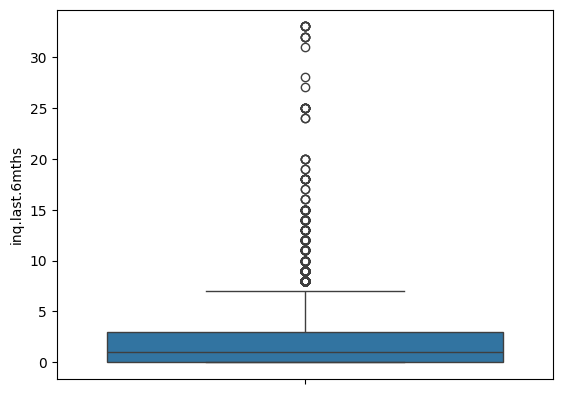

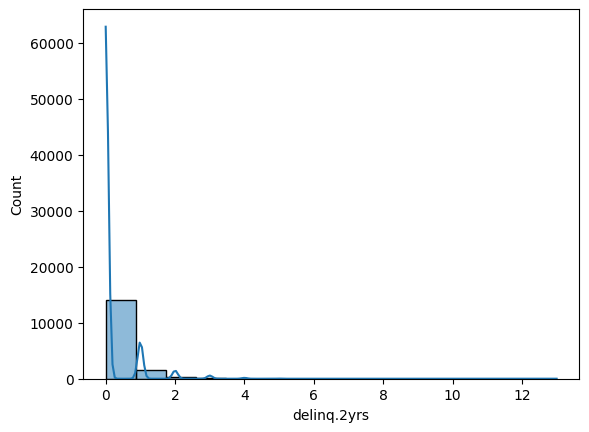

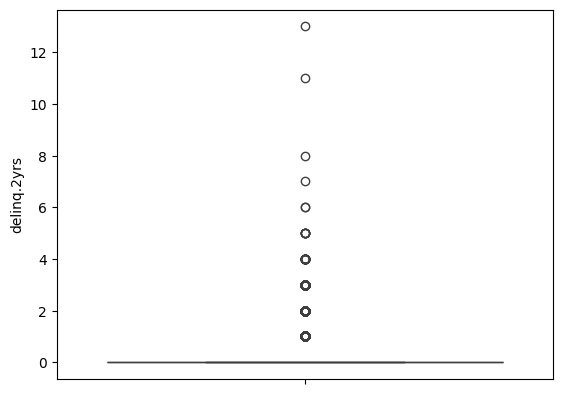

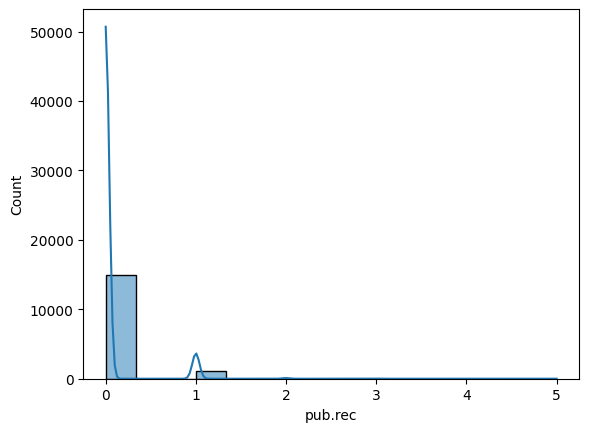

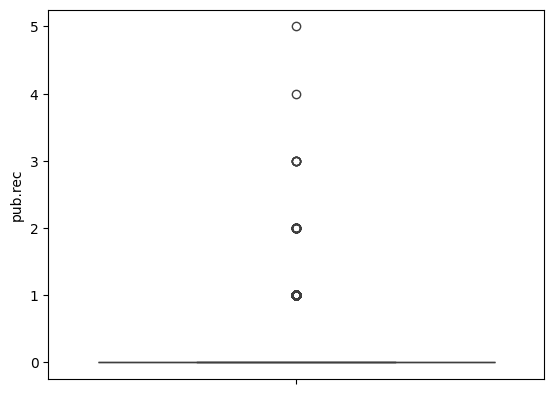

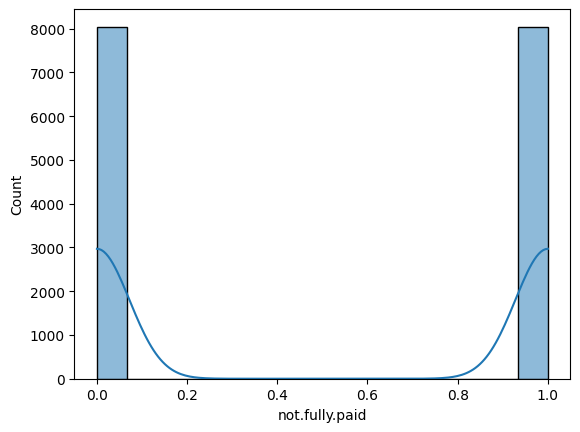

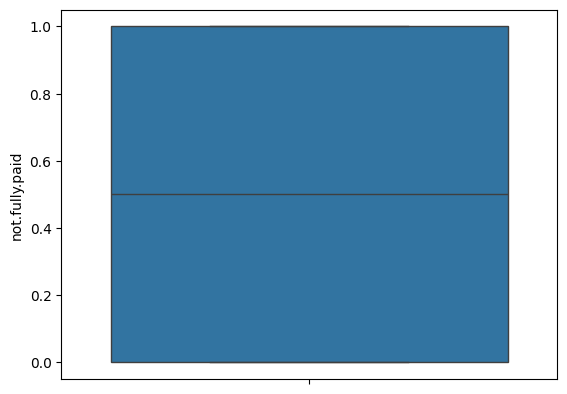

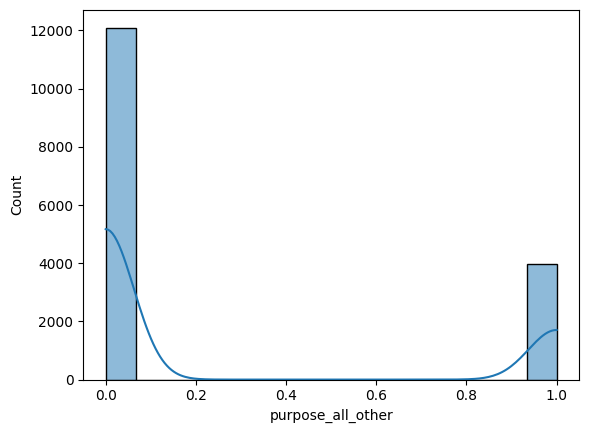

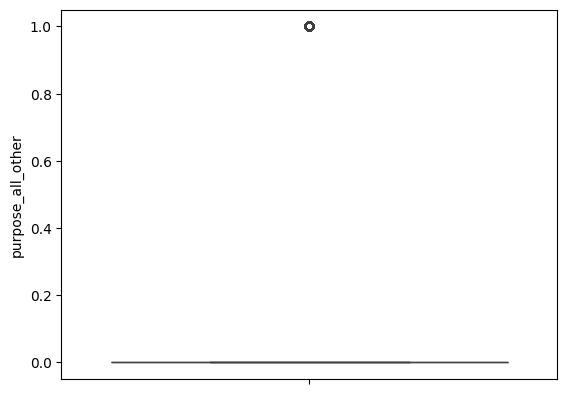

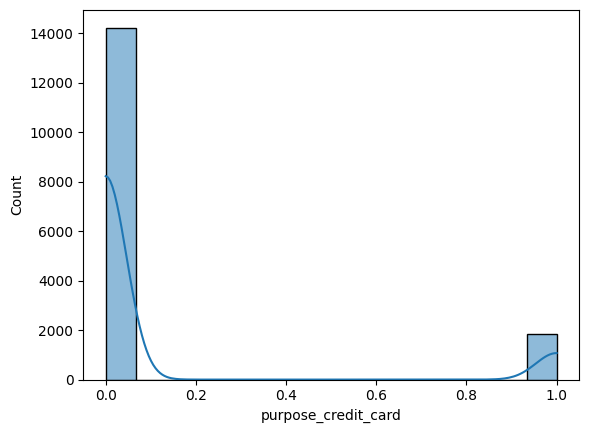

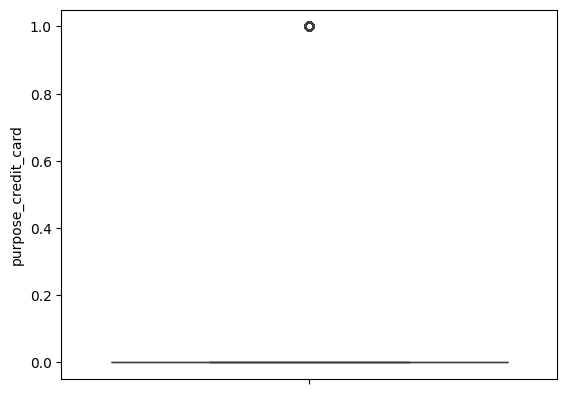

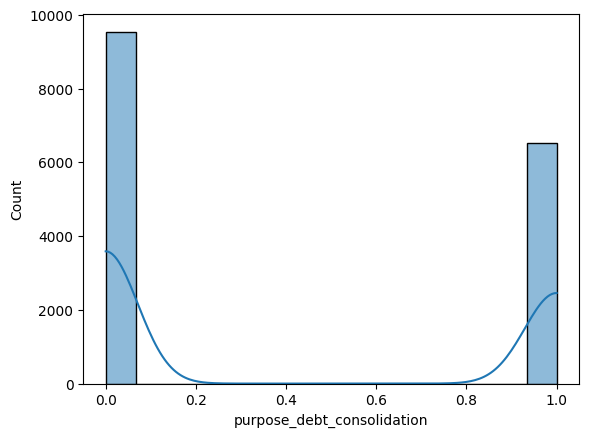

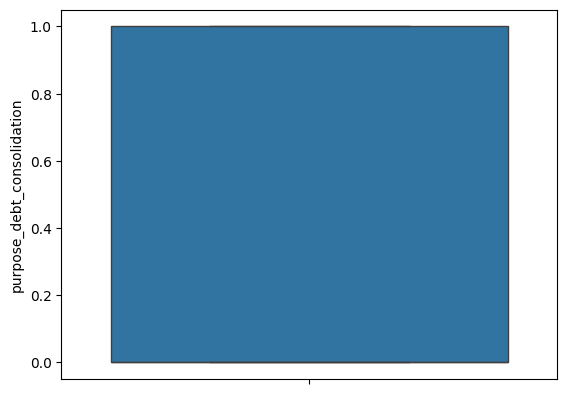

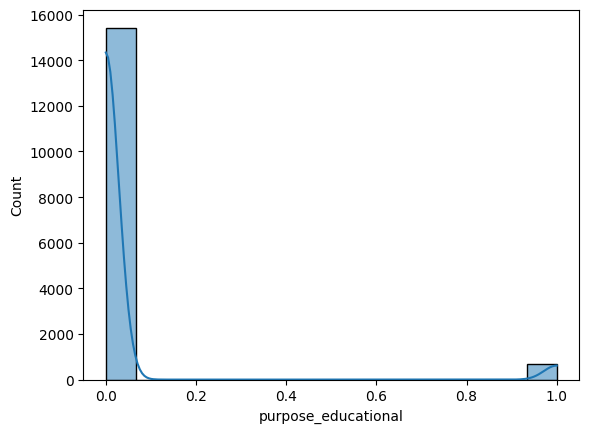

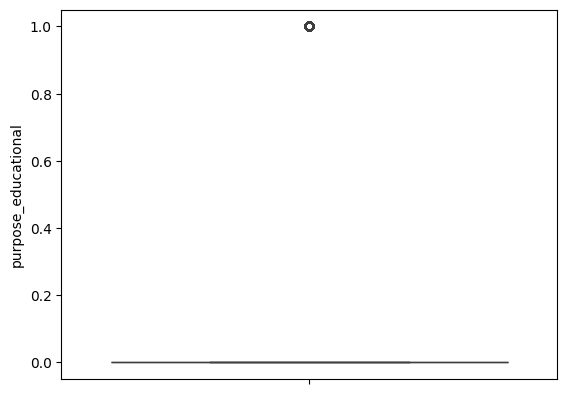

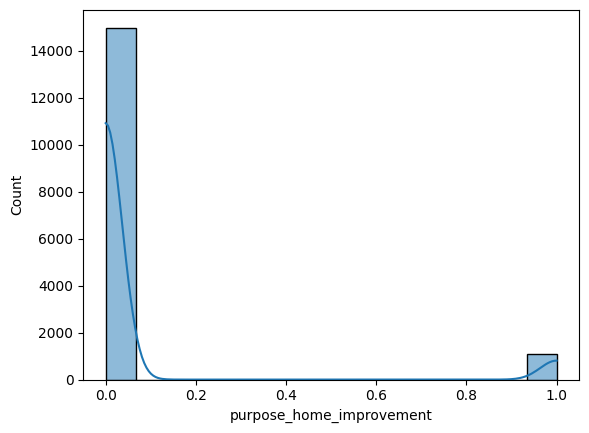

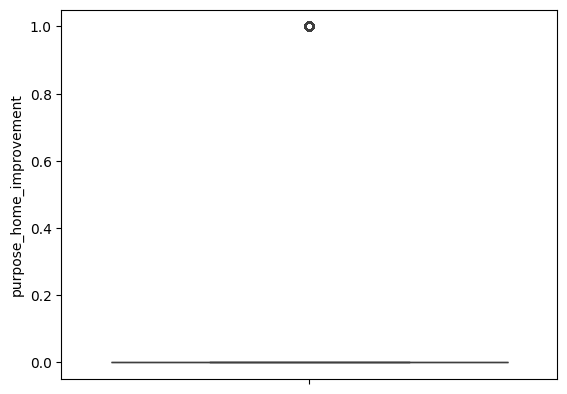

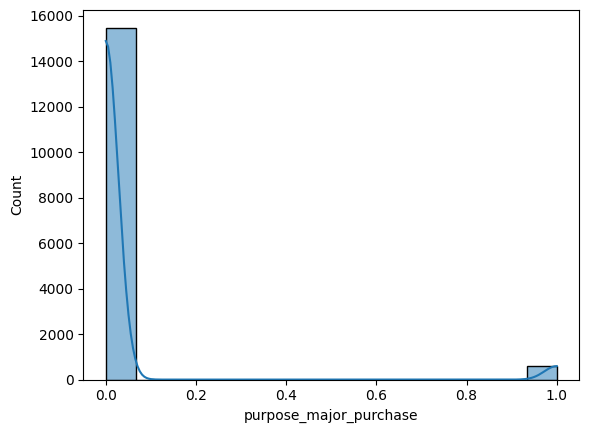

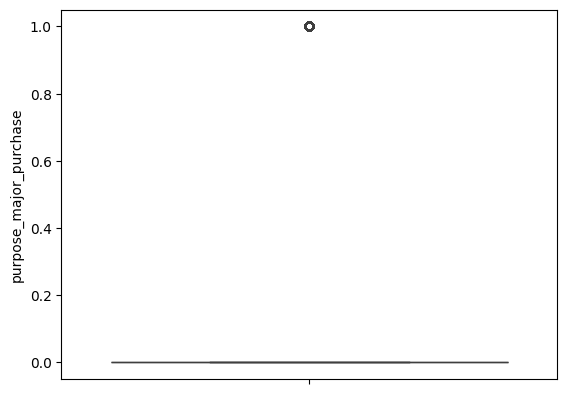

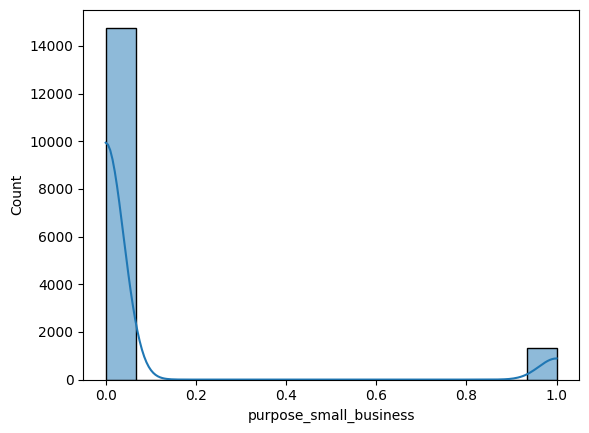

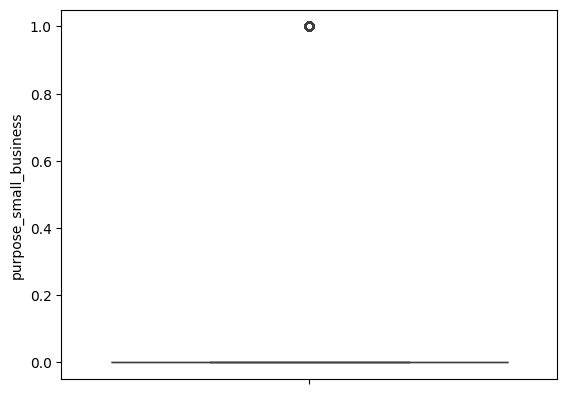

In [420]:
for c in loansdf.columns:
    sea.histplot(loansdf[c], kde = True)
    pyp.show()
    sea.boxplot(y = loansdf[c])
    pyp.show()
    

Number 3. checking and removing features with strong correlation. 

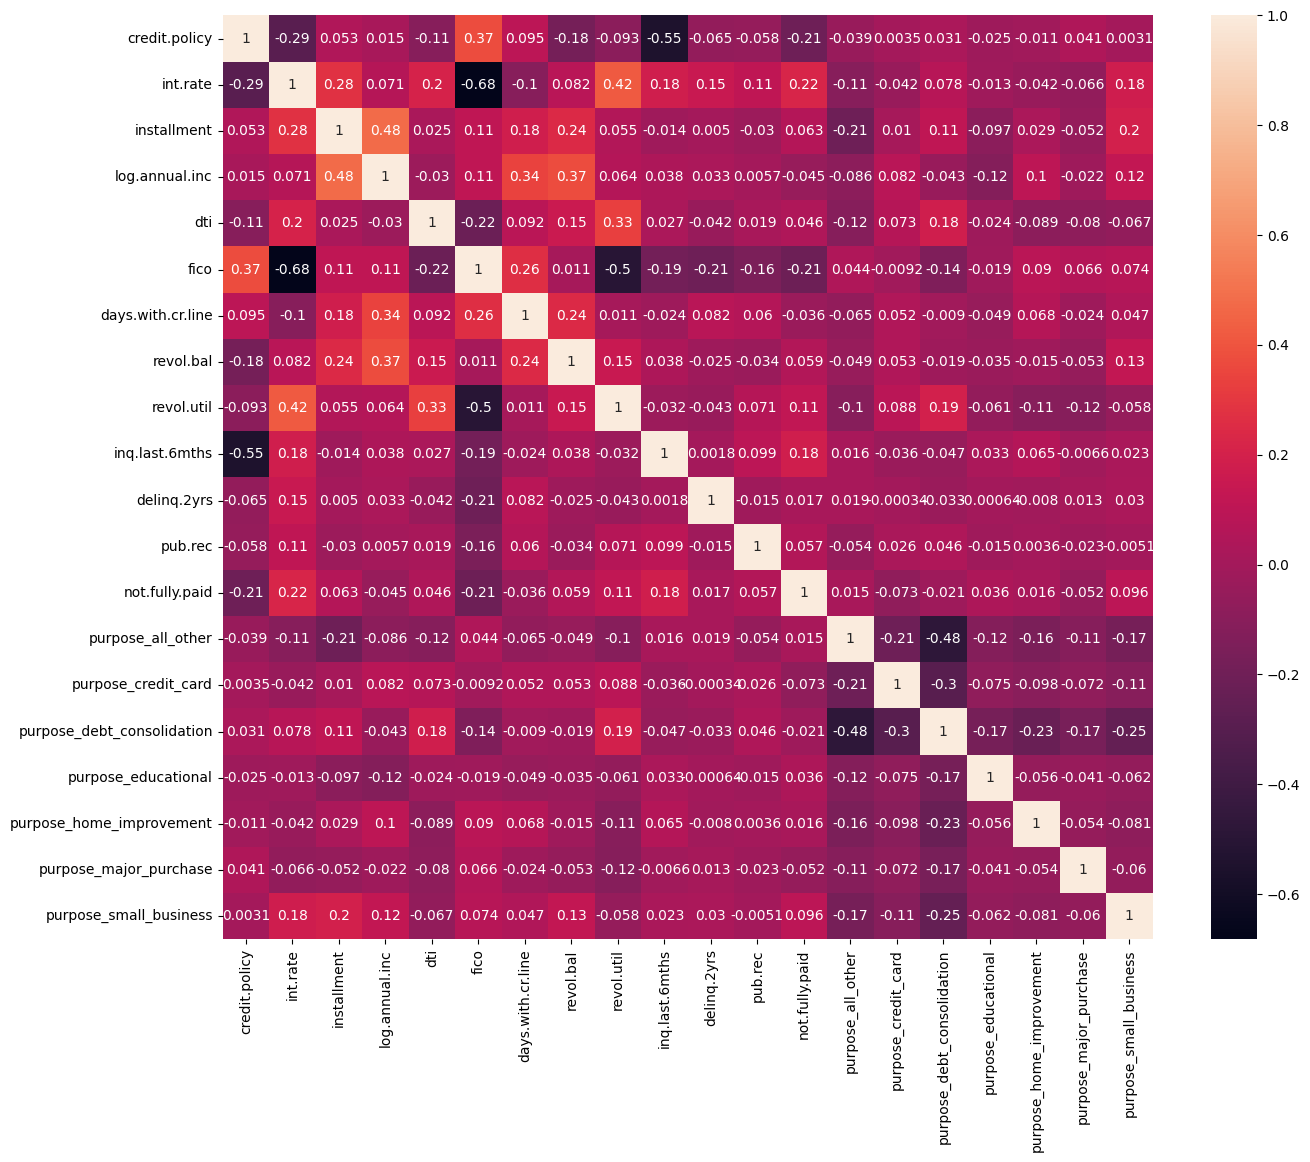

In [421]:
#a heatmap is a good way to indictate correlation. 
matrix = loansdf.corr()
pyp.figure(figsize = (15,12))
sea.heatmap(data = loansdf.corr(), annot = True)
pyp.show()

In [422]:
#Next, we wanna identify  those with strong correlation only.
corr_pairs = matrix.unstack()
sort_pairs = corr_pairs.sort_values(kind = 'quicksort')
stro_pairs = sort_pairs[abs(sort_pairs) > 0.5]

print(stro_pairs)

int.rate                    fico                         -0.682642
fico                        int.rate                     -0.682642
credit.policy               inq.last.6mths               -0.547579
inq.last.6mths              credit.policy                -0.547579
int.rate                    int.rate                      1.000000
purpose_credit_card         purpose_credit_card           1.000000
purpose_debt_consolidation  purpose_debt_consolidation    1.000000
log.annual.inc              log.annual.inc                1.000000
dti                         dti                           1.000000
purpose_educational         purpose_educational           1.000000
revol.util                  revol.util                    1.000000
purpose_all_other           purpose_all_other             1.000000
not.fully.paid              not.fully.paid                1.000000
pub.rec                     pub.rec                       1.000000
delinq.2yrs                 delinq.2yrs                   1.00

A strong correlation typically falls under the absolute value of 0.75. None of the other correlations contain this. and a defauT produces a 91.7% accuracy. removing two of the columns (fico and inq.last.6mths) based on correlations  or a correlation (int.rate) and the biggest skewer (revol.bal)  causes it to drop to 90%. removing one (int.rate) produces a 91.8% accuracy. Removing revol.bal alone produced a 92.3 accuracy which is the highest ever.

In [423]:
loansdf = loansdf.drop("revol.bal", axis = 1)



Number 4. Training the keras module. 

In [424]:
#create x and y test and train
x = loansdf.drop("not.fully.paid", axis = 1)
y = loansdf["not.fully.paid"]
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=108, stratify=y)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

#check train shape
X_train_s.shape

(12872, 18)

In [425]:
#Model creation and summary
model = Sequential([keras.layers.Dense(256, activation = "relu",input_shape = [18]),
                   keras.layers.Dropout(0.3),
                  keras.layers.Dense(256, activation = "relu"),
                   keras.layers.Dropout(0.3),
                   keras.layers.Dense(1, activation="sigmoid")])
model.summary()


C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 256)            │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,913 (277.00 KB)

 Trainable params: 70,913 (277.00 KB)

 Non-trainable params: 0 (0.00 B)

In [426]:
#model testing
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
result = model.fit(
    X_train_s, y_train,
    validation_data=(X_test_s, y_test),
    batch_size=256,
    epochs=1000,
    verbose=1,
)


Epoch 1/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6054 - loss: 0.6593 - val_accuracy: 0.6392 - val_loss: 0.6259
Epoch 2/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6423 - loss: 0.6311 - val_accuracy: 0.6439 - val_loss: 0.6220
Epoch 3/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6384 - loss: 0.6302 - val_accuracy: 0.6367 - val_loss: 0.6185
Epoch 4/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6477 - loss: 0.6175 - val_accuracy: 0.6383 - val_loss: 0.6185
Epoch 5/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6497 - loss: 0.6204 - val_accuracy: 0.6563 - val_loss: 0.6131
Epoch 6/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6593 - loss: 0.6123 - val_accuracy: 0.6507 - val_loss: 0.6119
Epoch 7/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6548 - loss: 0.6164 - val_accuracy: 0.6448 - val_loss: 0.6102
Epoch 8/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6529 - loss: 0.6149 - val_accuracy: 0

In [427]:
#generate predictions
predictions =(model.predict(X_test_s)>0.5).astype("int32")
predictions


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [428]:
# check accuracy
accuracy_score(y_test, predictions)


0.9226227470478559

In [429]:
#print report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1609
           1       0.88      0.99      0.93      1609

    accuracy                           0.92      3218
   macro avg       0.93      0.92      0.92      3218
weighted avg       0.93      0.92      0.92      3218

